## Model Objectives:
- Dataset: Tourism Nova Scotia - Operator Types for 2024
- K-means: Using Longitude and Latitude as the features for clustering, as K-Means will use the values of these columns to form clusters based on geographical proximity.
- PCA allows for dimensionality reduction while retaining most of the data's variance.  
- The explained variance ratio for each principal component helps determine how much of the original data's variability is captured by each principal component.
- For the demonstration, we will check the clusters against the 'Type' label.

In [1]:
# importing the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load the Dataset

In [2]:
data = './Tourism_Nova_Scotia_Listed_OperatorsUpdated_20241021.csv'

df = pd.read_csv(data)
df.head(3)

,Region,Name,Type,Longitude,Latitude,Location
0,South Shore,1 and Only Riverside Accommodations,Accommodation,-65.039340,43.826116,"(43.826116, -65.03934)"
1,Cabot Trail,11827 Cabot Trail,Accommodation,-61.075365,46.494720,"(46.49472, -61.075365)"
2,Cabot Trail,13791 Cabot Trail,Accommodation,-61.025454,46.568788,"(46.568788, -61.025454)"


## Add Features to the DataFrame

In [3]:
df.columns

Index(['Region', 'Name', 'Type', 'Longitude', 'Latitude', 'Location'], dtype='object')

In [4]:
# to check the possible outcomes
df['Type'].unique()

array(['Accommodation', 'Attraction', 'Campground', 'Eat & Drink',
       'Fine Arts', 'Outdoors', 'Tour Ops', 'Trails'], dtype=object)

## Exploratory Data Analysis (EDA)

In [5]:
df.shape

(2519, 6)

In [6]:
#Check for nulls or missing data in the dataset
df.isna().sum()

Region        0
Name          0
Type          0
Longitude    47
Latitude     47
Location     47
dtype: int64

In [7]:
#drop the null value rows if present in the dataset
'''
Courtesy:Docstring (Shift + Tab)
axis : {0 or 'index', 1 or 'columns'}, default 0, only a single axis is allowed.
    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.  
how : {'any', 'all'}, default 'any'
    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.
'''
df = df.dropna(axis= 0,how= 'any')

In [8]:
#Make sure nulls or missing data is removed successfully
df.isna().sum()

Region       0
Name         0
Type         0
Longitude    0
Latitude     0
Location     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472 entries, 0 to 2518
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     2472 non-null   object 
 1   Name       2472 non-null   object 
 2   Type       2472 non-null   object 
 3   Longitude  2472 non-null   float64
 4   Latitude   2472 non-null   float64
 5   Location   2472 non-null   object 
dtypes: float64(2), object(4)
memory usage: 135.2+ KB


In [10]:
# Convert/reclassify any 'object' datatypes as required since 'category' datatype is more efficient. This is optional.

columns_to_convert = ['Region', 'Name', 'Type', 'Location']
for col in columns_to_convert:
    df[col] = df[col].astype('category')
 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472 entries, 0 to 2518
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Region     2472 non-null   category
 1   Name       2472 non-null   category
 2   Type       2472 non-null   category
 3   Longitude  2472 non-null   float64 
 4   Latitude   2472 non-null   float64 
 5   Location   2472 non-null   category
dtypes: category(4), float64(2)
memory usage: 239.4 KB


## Prep the Data (X and label) 
### label is to see the clusters based on. In unsupervised learning, there isn't a target variable to compare predictions against (no y_pred).

In [11]:
df.columns

Index(['Region', 'Name', 'Type', 'Longitude', 'Latitude', 'Location'], dtype='object')

In [12]:
# Variable set-up

label_column = ['Region', 'Name', 'Type']
test_size = 0.3
random_state = 42
mdl_selected = 'K-Means Clustering'

In [13]:
# using only two independent variables / features for this pass
X = df.drop(columns= label_column)


In [14]:
X.head()

,Longitude,Latitude,Location
0,-65.039340,43.826116,"(43.826116, -65.03934)"
1,-61.075365,46.494720,"(46.49472, -61.075365)"
2,-61.025454,46.568788,"(46.568788, -61.025454)"
3,-63.330050,44.643720,"(44.64372, -63.33005)"
4,-61.029663,46.594279,"(46.594279, -61.029663)"


In [15]:
# one-hot encoding
X = pd.get_dummies(X, drop_first=True)
X.head()

,Longitude,Latitude,"Location_(43.41946, -65.62093)","Location_(43.44765, -65.63967)","Location_(43.463583, -65.577334)","Location_(43.483096, -65.610433)","Location_(43.492892, -65.708703)","Location_(43.495523, -65.703479)","Location_(43.511928, -65.471904)","Location_(43.519367, -65.614767)",...,"Location_(46.89949, -60.450756)","Location_(46.901878, -60.454354)","Location_(46.94321, -60.464923)","Location_(46.943917, -60.466783)","Location_(46.998838, -60.479045)","Location_(47.002412, -60.467041)","Location_(47.002512, -60.457397)","Location_(47.003067, -60.46722)","Location_(47.022912, -60.558138)","Location_(47.025849, -60.559302)"
0,-65.039340,43.826116,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-61.075365,46.494720,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-61.025454,46.568788,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-63.330050,44.643720,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-61.029663,46.594279,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Standardize the Data
KMeans is effected by scale so you need to scale the features in the data before using KMeans. 
- You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features.

In [16]:
# fit and transform the X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X[0:3]

array([[-0.45063851, -1.61447863, -0.02011702, ..., -0.02011702,
        -0.02011702, -0.02011702],
       [ 0.54127582,  1.72053182, -0.02011702, ..., -0.02011702,
        -0.02011702, -0.02011702],
       [ 0.55376516,  1.81309616, -0.02011702, ..., -0.02011702,
        -0.02011702, -0.02011702]], shape=(3, 2368))

## Plot Data to Estimate Number of Clusters
If your data is 2 or three dimensional, it is a good idea to plot your data before clustering.

## PCA Projection

In [17]:
# instantiate instance of PCA
pca = PCA(n_components=2)

In [18]:
princ_comps = pca.fit_transform(X)

In [19]:
# if there are more clusters, adjust the princ_comps_df columns
princ_comps_df = pd.DataFrame(data = princ_comps, columns = ['princ_comp1', 'princ_comp2'])
princ_comps_df.head()

,princ_comp1,princ_comp2
0,-1.930989,-0.987272
1,2.100649,1.873997
2,2.151364,1.576483
3,-0.566447,-0.158084
4,2.226009,1.519983


## Visualize 2D Projection
PCA projection to 2D to visualize the entire data set. 

In [20]:
label = df['Type']

princ_comps_df['label'] = label
princ_comps_df.head()

,princ_comp1,princ_comp2,label
0,-1.930989,-0.987272,Accommodation
1,2.100649,1.873997,Accommodation
2,2.151364,1.576483,Accommodation
3,-0.566447,-0.158084,Accommodation
4,2.226009,1.519983,Accommodation


In [21]:
princ_comps_df.columns

Index(['princ_comp1', 'princ_comp2', 'label'], dtype='object')

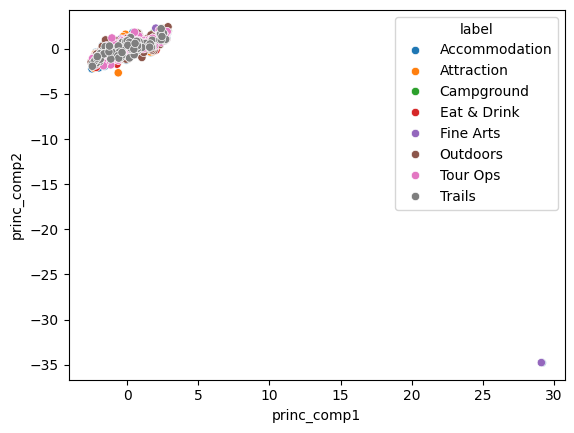

In [22]:
sns.scatterplot(data=princ_comps_df, x= 'princ_comp1', y= 'princ_comp2', hue='label');

## Explained Variance

In [23]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.00098871, 0.00068155]), np.float64(0.0016702606522738474))

In [24]:
print(f'These principal component contains ~ {(sum(pca.explained_variance_ratio_)) *100:.3f}% of the information in the dataset.')

These principal component contains ~ 0.167% of the information in the dataset.


## KMeans Clustering
In K-Means clustering, you need to specify the number of clusters (k) you want. In Scikit-Learn, this parameter is called `n_clusters`.   

In [25]:
# Make an instance of KMeans with 2 clusters, since we have air, road as Mode_of_Entry
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans

KMeans(n_clusters=2, random_state=42)

In [26]:
# Fit only on a features matrix
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [27]:
# Get labels and cluster centroids
k_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [28]:
k_labels, centroids

(array([0, 1, 1, ..., 0, 0, 1], shape=(2472,), dtype=int32),
 array([[-0.28113812, -0.65644087,  0.01207021, ..., -0.02011702,
         -0.02011702, -0.02011702],
        [ 0.46856353,  1.09406811, -0.02011702, ...,  0.03352837,
          0.03352837,  0.03352837]], shape=(2, 2368)))

In [29]:
df.head()

,Region,Name,Type,Longitude,Latitude,Location
0,South Shore,1 and Only Riverside Accommodations,Accommodation,-65.039340,43.826116,"(43.826116, -65.03934)"
1,Cabot Trail,11827 Cabot Trail,Accommodation,-61.075365,46.494720,"(46.49472, -61.075365)"
2,Cabot Trail,13791 Cabot Trail,Accommodation,-61.025454,46.568788,"(46.568788, -61.025454)"
3,Eastern Shore,3 Moonlight Beach Suites,Accommodation,-63.330050,44.643720,"(44.64372, -63.33005)"
4,Cabot Trail,97 Cheticamp Island Road,Accommodation,-61.029663,46.594279,"(46.594279, -61.029663)"


In [30]:
df['k_labels'] = k_labels
df.to_csv('./kmeans_Tourism_MoE_result.csv')
df.head()

,Region,Name,Type,Longitude,Latitude,Location,k_labels
0,South Shore,1 and Only Riverside Accommodations,Accommodation,-65.039340,43.826116,"(43.826116, -65.03934)",0
1,Cabot Trail,11827 Cabot Trail,Accommodation,-61.075365,46.494720,"(46.49472, -61.075365)",1
2,Cabot Trail,13791 Cabot Trail,Accommodation,-61.025454,46.568788,"(46.568788, -61.025454)",1
3,Eastern Shore,3 Moonlight Beach Suites,Accommodation,-63.330050,44.643720,"(44.64372, -63.33005)",0
4,Cabot Trail,97 Cheticamp Island Road,Accommodation,-61.029663,46.594279,"(46.594279, -61.029663)",1


In [31]:
df.columns

Index(['Region', 'Name', 'Type', 'Longitude', 'Latitude', 'Location',
       'k_labels'],
      dtype='object')

In [32]:
# do some EDA on the outputs...
df[['Type', 'k_labels']].value_counts()


Type           k_labels
Accommodation  0           420
               1           333
Eat & Drink    0           316
Attraction     0           251
Outdoors       0           174
               1           127
Attraction     1           117
Tour Ops       0           110
Eat & Drink    1           107
Fine Arts      0           105
Trails         0            88
Campground     0            81
Trails         1            74
Campground     1            61
Fine Arts      1            58
Tour Ops       1            50
Name: count, dtype: int64

## Visually Evaluate the Clusters per Proximity to the Centroids

In [33]:
centroids

array([[-0.28113812, -0.65644087,  0.01207021, ..., -0.02011702,
        -0.02011702, -0.02011702],
       [ 0.46856353,  1.09406811, -0.02011702, ...,  0.03352837,
         0.03352837,  0.03352837]], shape=(2, 2368))

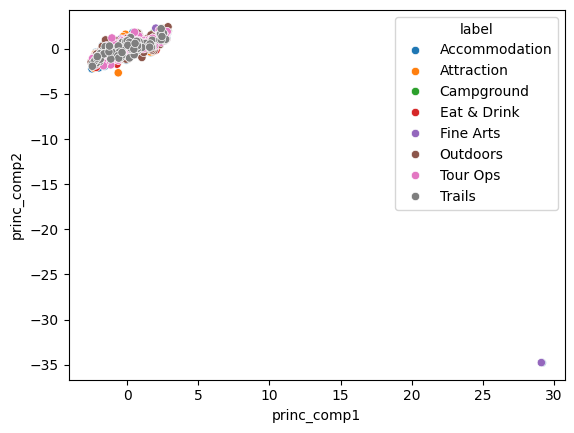

In [34]:
# visually look to see your segments
sns.scatterplot(data = princ_comps_df, x= 'princ_comp1', y = 'princ_comp2', hue='label');

## Metrics

### Inertia (WCSS): Measures the compactness of clusters.
Lower inertia means that the clusters are tightly packed and well-defined. However, inertia decreases as the number of clusters increases, so it's more useful for comparing different values of K rather than as a standalone measure.

In [35]:
# Fit the K-Means model
kmeans = KMeans(n_clusters= 2)
kmeans.fit(X)  # X is the Longitude and Latitude data

# Get the inertia value
inertia = kmeans.inertia_
print(f"Inertia for {mdl_selected} model is {inertia:.2f}")


Inertia for K-Means Clustering model is 5849189.05
